# Exercises

## Packages

In [20]:
import matplotlib.pyplot as plt
import numpy as np

## Initial Conditions

In [21]:
#For-Loop - Initial Conditions
start = 3
samples = 50
reps = 1000

# Random Generator - Initial Conditions
mu = 50
sigma = 10

## Random Generator

In [22]:
# Creating a random generator

generator_list = [np.random.randn(variable) * sigma + mu for variable in range(start,samples)]

In [23]:
d_list = [(1/len(every_list) * sum([np.abs(element-mu) for element in every_list])) for every_list in generator_list]

In [24]:
s_list = [(1/len(every_list) * sum(np.square([element-mu for element in every_list])))**(1/2) for every_list in generator_list]

In [25]:
s2_list = [(1/(len(every_list)-1) * sum(np.square([element-mu for element in every_list])))**(1/2) for every_list in generator_list]

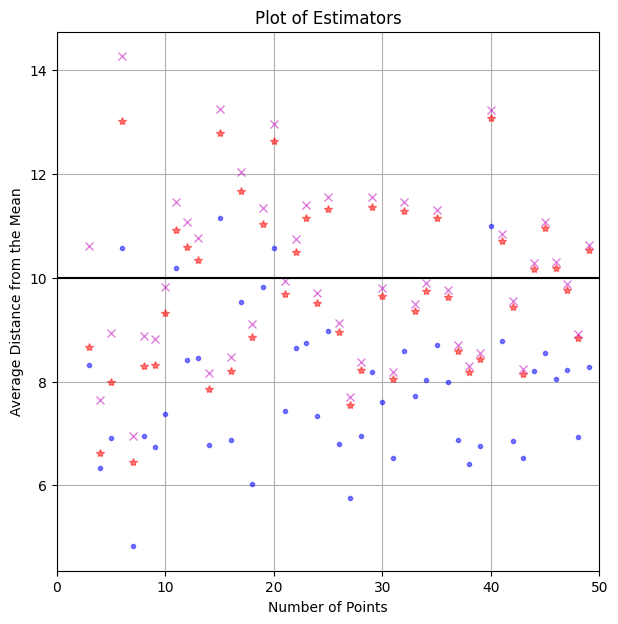

In [26]:
# Plot

plt.figure(figsize=(7,7))

for every_list, every_d in zip(generator_list, d_list):
  plt.plot(len(every_list), every_d, '.b', alpha=0.5)

for every_list, every_s in zip(generator_list, s_list):
  plt.plot(len(every_list), every_s, '*r', alpha=0.5)

for every_list, every_s2 in zip(generator_list, s2_list):
  plt.plot(len(every_list), every_s2, 'xm', alpha=0.5)

plt.hlines(sigma, 0, samples, color="black")

plt.title('Plot of Estimators')
plt.xlabel('Number of Points')
plt.ylabel('Average Distance from the Mean')
plt.xlim(0, samples)
plt.grid()

## S1 vs S2

In [27]:
#Standard Deviation

generator_list = []

for n in range(start, samples):
  reps_list = [list(np.random.randn(n) * sigma + mu) for times in range(1, reps)]
  generator_list.append(reps_list)

In [28]:
s_list = []

for every_list in generator_list:
  partial_list = [(1/len(element_list) * sum(np.square([element-mu for element in element_list]))) for element_list in every_list]
  s_list.append(partial_list)

In [29]:
s2_list = []

for every_list in generator_list:
  partial_list = [(1/(len(element_list)-1) * sum(np.square([element-mu for element in element_list]))) for element_list in every_list]
  s2_list.append(partial_list)

In [30]:
average_list = [np.average(s_list[i]) for i in range(len(s_list))]

average2_list = [np.average(s2_list[i]) for i in range(len(s2_list))]

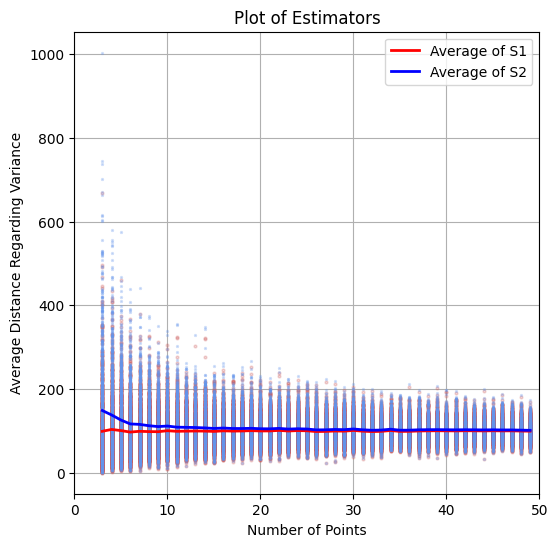

In [31]:
# Plot

plt.figure(figsize=(6,6))

for every_list, every_s_list in zip(generator_list, s_list):
  for element_list, every_s in zip(every_list, every_s_list):
    plt.plot(len(element_list), every_s, alpha=0.25, ms=2, marker="o", color="indianred")

for every_list, every_s2_list in zip(generator_list, s2_list):
  for element_list, every_s in zip(every_list, every_s2_list):
    plt.plot(len(element_list), every_s, alpha=0.25, ms=2, marker="*", color="cornflowerblue")

plt.plot(range(start, samples), average_list, lw=2, label='Average of S1', color="red")
plt.plot(range(start, samples), average2_list, lw=2, label='Average of S2', color="blue")

plt.title('Plot of Estimators')
plt.xlabel('Number of Points')
plt.ylabel('Average Distance Regarding Variance')
plt.xlim(0, samples)
plt.grid()
plt.legend();

## S1 vs S2 with µ Averaged

In [49]:
# #Standard Deviation with µ Averaged

mu_averaged_list = []

for i in range(len(generator_list)):
   mu_partial_list = [np.average(list(generator_list[i])) for u in range(reps)]
   mu_averaged_list.append(mu_partial_list)

In [50]:
s_list_newmu = []

for every_list in generator_list:
  partial_list = []
  for element_list in every_list:
    i = generator_list.index(every_list)
    u = every_list.index(element_list)
    s = (1/len(element_list) * sum(np.square([element-mu_averaged_list[i][u] for element in element_list])))
    partial_list.append(s)
  s_list_newmu.append(partial_list)

In [51]:
s2_list_newmu = []

for every_list in generator_list:
  partial_list = []
  for element_list in every_list:
    i = generator_list.index(every_list)
    u = every_list.index(element_list)
    s2 = (1/(len(element_list)-1) * sum(np.square([element-mu_averaged_list[i][u] for element in element_list])))
    partial_list.append(s2)
  s2_list_newmu.append(partial_list)

In [52]:
averaged_list = [np.average(s_list_newmu[i]) for i in range(len(s_list_newmu))]

averaged2_list = [np.average(s2_list_newmu[i]) for i in range(len(s2_list_newmu))]

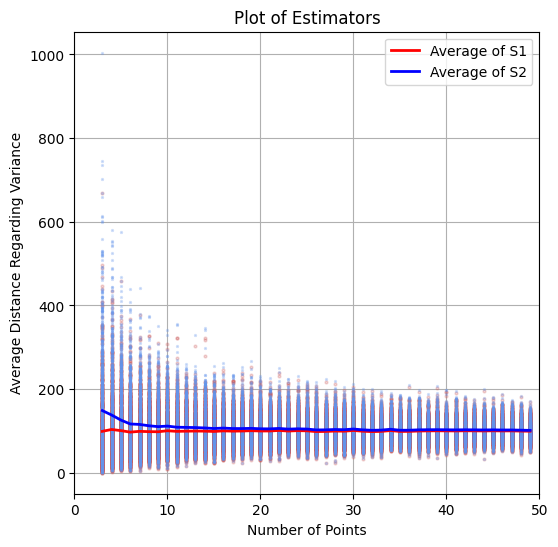

In [53]:
# Plot

plt.figure(figsize=(6,6))

for every_list, every_s_list in zip(generator_list, s_list_newmu):
  for element_list, every_s in zip(every_list, every_s_list):
    plt.plot(len(element_list), every_s, alpha=0.25, ms=2, marker="o", color="indianred")

for every_list, every_s2_list in zip(generator_list, s2_list_newmu):
  for element_list, every_s in zip(every_list, every_s2_list):
    plt.plot(len(element_list), every_s, alpha=0.25, ms=2, marker="*", color="cornflowerblue")

plt.plot(range(start, samples), averaged_list, lw=2, label='Average of S1', color="red")
plt.plot(range(start, samples), averaged2_list, lw=2, label='Average of S2', color="blue")

plt.title('Plot of Estimators')
plt.xlabel('Number of Points')
plt.ylabel('Average Distance Regarding Variance')
plt.xlim(0, samples)
plt.grid()
plt.legend();